## What is Unsupervised Learning

Unsupervised learning uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention. Its ability to discover similarities and differences in information make it the ideal solution for exploratory data analysis, cross-selling strategies, customer segmentation, and image recognition.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

from sklearn import cluster, datasets, mixture
import matplotlib.pyplot as plt

Here is the code for generating some random data in a two-dimensional space:

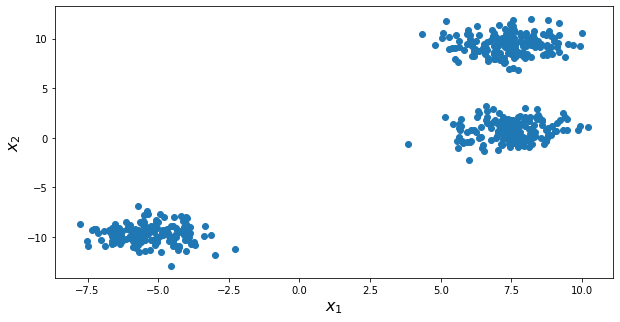

In [2]:
random_state = 170
n_samples = 500
blobs, y = datasets.make_blobs(n_samples=n_samples, random_state=8)

fig , ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(blobs[:,0], blobs[:,1] )
ax.set_xlabel("$x_1$", fontsize = 16 )
ax.set_ylabel("$x_2$", fontsize = 16 )
plt.show()

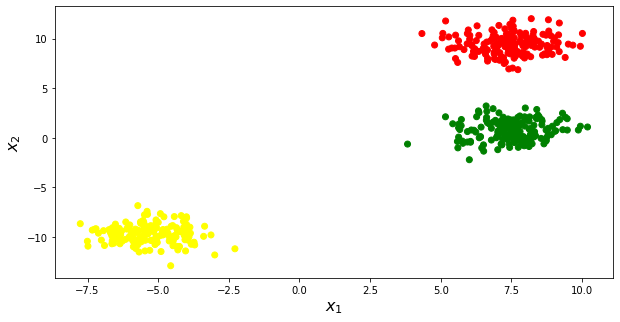

In [3]:
from sklearn.cluster import KMeans
kmean = KMeans(3)
kmean.fit(blobs)
y_pred = kmean.predict(blobs)

color_map={
    1:"red",
    0:"yellow",
    2:"green"
}
color = [color_map[i] for i in y_pred]

fig , ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(blobs[:,0], blobs[:,1], c = color )
ax.set_xlabel("$x_1$", fontsize = 16 )
ax.set_ylabel("$x_2$", fontsize = 16 )
plt.show()

In this case, we arbitrarily gave k (n_clusters) an arbitrary value of two.
Here is the output of the K-means parameters we get if we run the code:

In [4]:
y_pred

array([0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0,
       1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2,
       0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 2, 2, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1,
       2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 0,
       2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2,
       0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1,

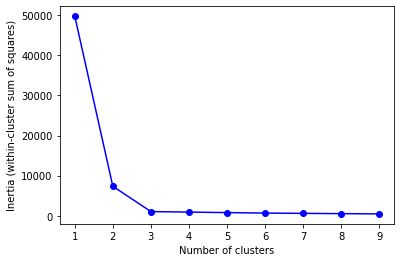

In [5]:
import warnings
warnings.simplefilter('ignore')

# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

Ks = range(1, 10)
inertia = [KMeans(i).fit(blobs).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

### Example 2 -  Country Risk

In [1]:
# loading packages 

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#### The Country Risk Dataset (J. C. Hull, 2019, Chapter 2)

Consider the problem of understanding the risk of countries for foreign investment. Among the features that can be used for this are:

- GDP growth rate (IMF)
- Corruption index (Transparency international)
- Peace index (Institute for Economics and Peace)
- Legal Risk Index (Property Rights Association)

Values for each of the features for 122 countries are found in the `countryriskdata.csv` (available [here](http://www-2.rotman.utoronto.ca/~hull))   

In [2]:
path = './data/'
raw = pd.read_csv(os.path.join(path, 'countryriskdata.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (122, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          39  1.867  3.822       3.403
1    Algeria     DZ          34  2.213  4.160       4.202
2  Argentina     AR          36  1.957  4.568      -2.298
3    Armenia     AM          33  2.218  4.126       0.208
4  Australia     AU          79  1.465  8.244       2.471


The GDP growth rate (%) is typically a positive or negative number with a magnitude less than 10. The corruption index is on a scale from 0 (highly corrupt) to 100 (no corruption). The peace index is on a scale from 1 (very peaceful) to 5 (not at all peaceful). The legal risk index runs from 0 to 10 (with high values being favorable).

### Simple exploratory analysis

**Print summary statistics**

Note that all features have quite different variances, and Corruption and Legal are highly correlated.

In [3]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  122.000000  122.000000  122.000000  122.000000
mean    46.237705    2.003730    5.598861    2.372566
std     19.126397    0.447826    1.487328    3.241424
min     14.000000    1.192000    2.728000  -18.000000
25%     31.250000    1.684750    4.571750    1.432250
50%     40.000000    1.969000    5.274000    2.496000
75%     58.750000    2.280500    6.476750    4.080000
max     90.000000    3.399000    8.633000    7.958000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.700477  0.923589    0.102513
Peace        -0.700477  1.000000 -0.651961   -0.199855
Legal         0.923589 -0.651961  1.000000    0.123440
GDP Growth    0.102513 -0.199855  0.123440    1.000000


**Plot histogram**

Note that distributions for GDP Growth is quite skewed.

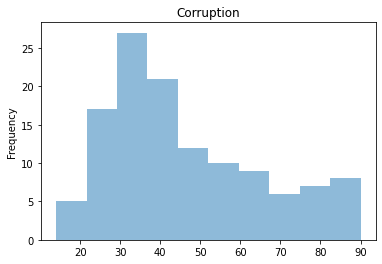

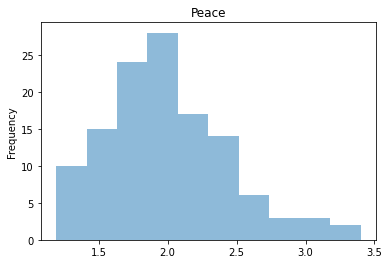

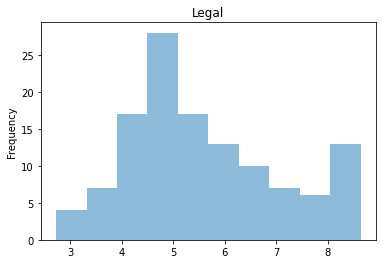

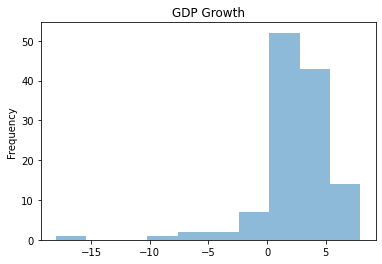

In [4]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

### K means cluster

**Pick features & normalization**

Since Corruption and Legal are highly correlated, we drop the Corruption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.

Ref. [Feature normalization.](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

In [5]:
raw.corr()

,Corruption,Peace,Legal,GDP Growth
Corruption,1.000000,-0.700477,0.923589,0.102513
Peace,-0.700477,1.000000,-0.651961,-0.199855
Legal,0.923589,-0.651961,1.000000,0.123440
GDP Growth,0.102513,-0.199855,0.123440,1.000000


In [6]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.305319 -1.194666    0.317896
1  0.467304 -0.967413    0.564392
2 -0.104348 -0.693096   -1.440899
3  0.478469 -0.990273   -0.667782
4 -1.202990  1.778450    0.030368


### Perform elbow method

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

For example in the following picture k=4 is suggested

![caption](./pic/chapter-3-1_pic_0.png)

In our case, the marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though).

Ref. [Determining the number of clusters in a dataset.](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

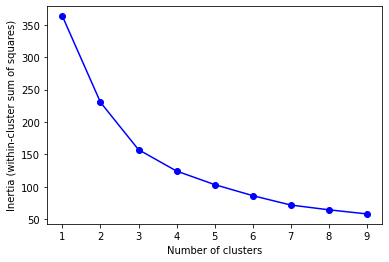

In [7]:
import warnings
warnings.simplefilter('ignore')

# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

***k*-means with k=3**

In [8]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 157.31661757321712
cluster centers:  [[ 2.65685249e-01 -4.51167794e-01  3.63120857e-01]
 [-9.69783061e-01  1.17216616e+00  1.73192818e-03]
 [ 1.39208980e+00 -1.04170733e+00 -1.79449174e+00]]
cluster labels:  [0 0 2 0 1 1 2 0 0 1 0 0 0 1 2 0 2 0 1 2 1 0 0 1 0 0 1 2 1 0 2 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 2 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 2 1 0 0 0 0 0 0 1 1 1 0 2 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 2 0 0
 0 2 1 1 1 1 2 0 2 0 0]


**Visualize the result (3D plot)**

<IPython.core.display.Javascript object>


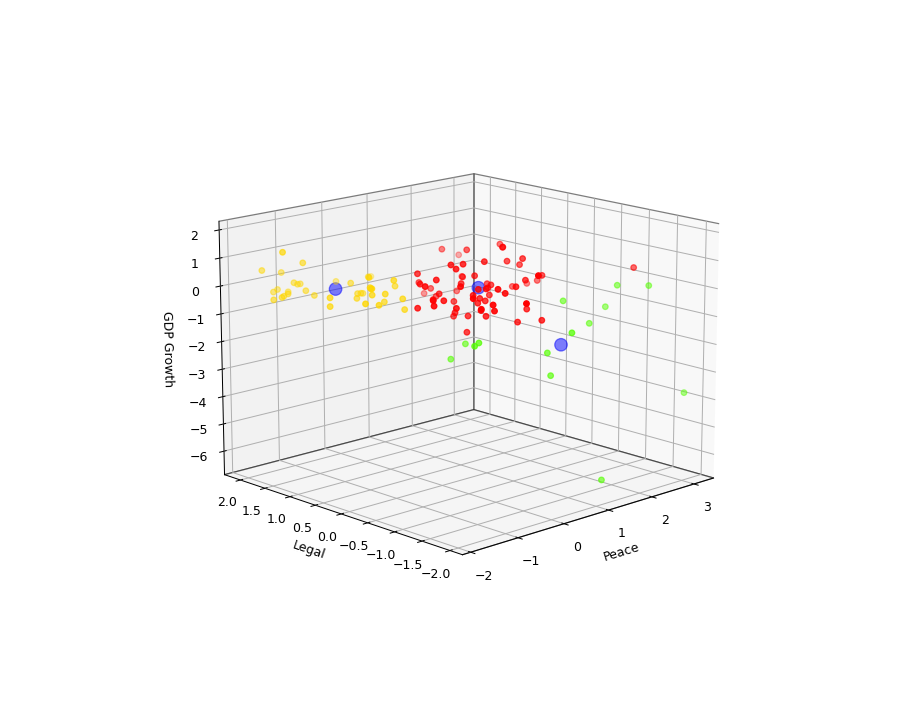

In [9]:
%matplotlib notebook

#
# Set up the color. The matplotlib.colors.Normalize class belongs to the matplotlib.colors module. 
# The matplotlib.colors module is used for converting color or numbers arguments to RGBA or RGB.
# This module is used for mapping numbers to colors or color specification conversion in a 1-D 
# array of colors also known as colormap. The matplotlib.colors.Normalize class is used to normalize 
# data into the interval of [0.0, 1.0].
#
norm = clrs.Normalize(vmin=0.,vmax=y.max())
#
# See https://matplotlib.org/stable/tutorials/colors/colormaps.html for choosing the appropriate color
# map for 3-D plot
#
cmap = cm.prism

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='blue', s=100, alpha=0.5, marker='o')

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

**Visualize the result (3 2D plots)**

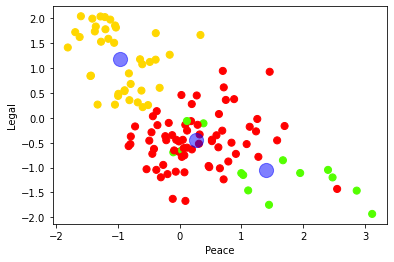

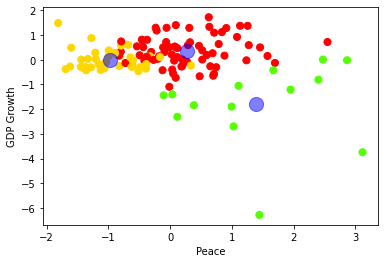

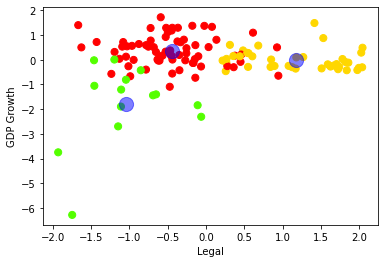

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='blue', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

**Visualize the result (3 2D plots)**

plot country abbreviations instead of dots.

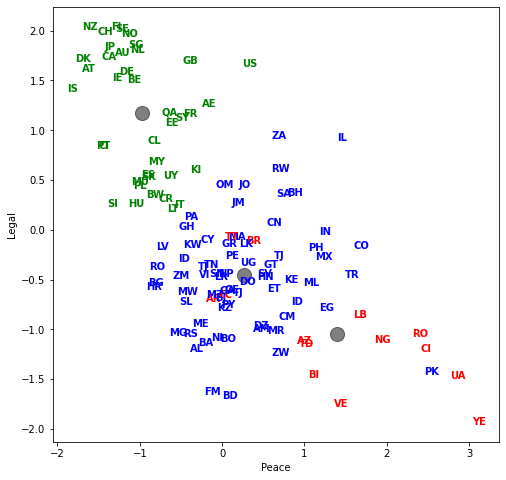

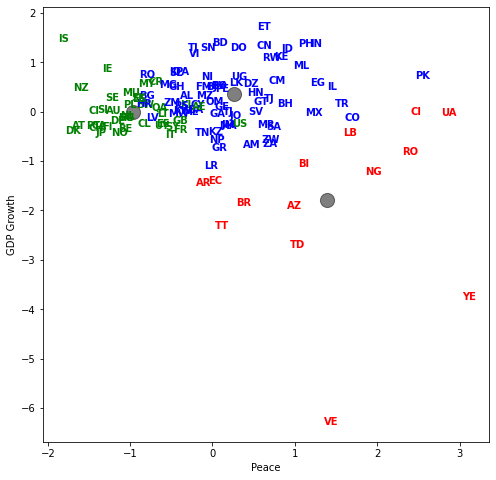

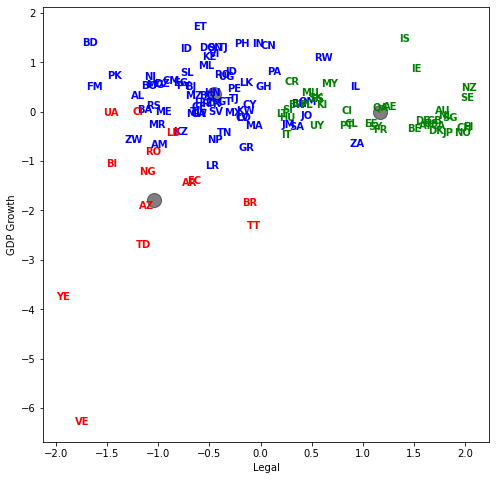

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### List the result

In [19]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
0                         Albania     AL      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
69                         Mexico     MX      0
67                     Mauritania     MR      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
120                        Zambia     ZM      0
59                         Latvia     LV      0
58                         Kuwait     KW      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
54                         Jordan     JO      0
52                        Jamaica     JM      0
50                         Israel     IL      0
48                           Iran     ID

## Exercise

In the csv file named `assignment.csv` you will find a list of 277 positions extracted from a managed portfolio. 
For each position, the annual performance recorded up to the cutoff date is reported.

It is required to analyze the performance distribution by identifying the number of clusters 
present with the kmeans method and discuss the following results:

- Exploratory data analysis
- Initial choice of a number of clusters and their identification using the kmeans method
- Graphic representation of the distributions obtained with indication of the centroids
- Extraction of the performance values of the individual clusters and analysis of the frequency distribution (histogram)
- Analysis of the choice of the number of clusters using the elbow and silhouette method
- Each result must be discussed in a synthetic but exhaustive way. 